In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import pandas as pd
import sys

In [2]:
# progress meter for big loops
# note: progress must go from 0 to 100 because reasons

def progress_meter(progress):
    sys.stdout.write("\rloading... %.1f%%" % progress)
    sys.stdout.flush()

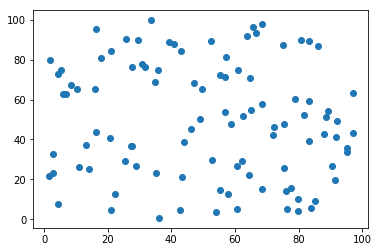

In [47]:
test_x = np.random.rand(100) * 100
test_y = np.random.rand(100) * 100

plt.scatter(test_x, test_y)
plt.show()

In [48]:
onc_gs = pd.DataFrame()

for i in range(len(test_x)):
    
    dist = []
    
    for j in range(len(test_x)):
        
        dist.append(np.sqrt(abs(test_x[i] - test_x[j])**2 + abs(test_y[i] - test_y[j])**2))
    
    onc_gs.loc[:,str(i)] = dist

onc_gs.insert(0,'y',pd.Series(test_y))
onc_gs.insert(0,'x',pd.Series(test_x))

onc_gs.insert(0,'catID',pd.Series(np.random.randint(1,1000,100)))

onc_gs.insert(0,'catname','')

onc_gs.loc[:40,'catname'] = 'A'
onc_gs.loc[40:75,'catname'] = 'B'
onc_gs.loc[75:,'catname'] = 'C'

onc_gs.insert(0,'oncflag','')
onc_gs.insert(0,'oncID',np.nan)

In [49]:
# new source numbering starts at highest ACS number + 1
new_source = max(onc_gs.loc[onc_gs['catname'] == 'A', 'catID'].values) + 1

dist_crit = 7

unique_only = False

# ====

exclude = set()

for k in range(len(onc_gs)):
    
    if k not in exclude:
        
        # find where dist < dist_crit
        m = onc_gs.loc[onc_gs[str(k)] < dist_crit]

        mindex = set(m[str(k)].index.tolist())

        mindex_updated = set(m[str(k)].index.tolist())

        mindex_same = False

        iter_count = 0

        # print 'initial', mindex

        # keep adding match values until no new values are added -- still in progress

        while mindex_same == False:
            for x in mindex:
                y = onc_gs.loc[onc_gs[str(x)] < dist_crit]

                yindex = set(y[str(x)].index.tolist())

                # print 'new', yindex

                mindex_updated.update(yindex)

            # print 'mindex', mindex
            # print 'updated', mindex_updated

            mindex_same = (mindex == mindex_updated)

            mindex.update(mindex_updated)

            iter_count += 1

        exclude.update(mindex)
        
        num_group = len(mindex)
        '''
        if iter_count > 1:
            onc_gs.loc[mindex,'oncflag'] += 'i'
        '''
        match = onc_gs.loc[mindex,['catname','catID']]
        
        # check for multiple sources in same catalog (any duplicates will flag as True)
        if True: #match.duplicated(subset='catname',keep=False).any() == True:

            onc_gs.loc[mindex,'oncflag'] += 'd' + str(num_group)

            # if only looking for uniques, skip assigning a number and continue on to the next source
            if unique_only == True:
                continue
        
        # use ACS number if it exists -- if multiple, use lowest
        if ('A' in match['catname'].values) == True:            
            onc_gs.loc[mindex,'oncID'] = min(match.loc[match['catname'] == 'A','catID'].values)

        # otherwise give it a new number
        else:
            onc_gs.loc[mindex,'oncID'] = new_source
            new_source += 1

        progress_meter(k*100./len(onc_gs))
    
if unique_only == True:
    print '\n', onc_gs['oncID'].count(), '/', len(onc_gs), 'sources non-ambiguously grouped'

onc_gs

loading... 97.0%

,oncID,oncflag,catname,catID,x,y,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,421.0,d4,A,795,89.188761,54.417515,0.000000,73.032555,86.879022,40.553636,...,35.635755,73.879619,34.913466,31.840638,82.689121,23.984063,7.772157,83.798724,37.104769,60.724301
1,328.0,d2,A,328,25.613405,90.360918,73.032555,0.000000,27.438879,46.459152,...,49.649935,26.855785,38.529088,81.725209,33.190032,53.293520,65.397839,10.766601,71.400605,13.731502
2,273.0,d3,A,273,4.329793,73.043300,86.879022,27.438879,0.000000,50.077851,...,72.227504,14.125304,56.587754,85.531890,10.450687,63.583664,80.052453,25.458029,72.671715,38.420916
3,252.0,d3,A,252,48.861675,50.136911,40.553636,46.459152,50.077851,0.000000,...,45.426519,36.070942,27.496105,36.204957,43.829951,16.966137,35.568254,55.960049,24.952731,40.032902
4,168.0,d6,A,840,87.878310,42.622093,11.867992,78.459631,88.914592,39.733743,...,46.333532,75.252335,42.047129,20.983910,83.447170,25.682534,17.397330,89.121075,29.110598,67.182165
5,587.0,d3,A,587,72.231987,46.303349,18.798188,64.143289,72.977620,23.682645,...,40.977675,59.235089,30.730338,20.911819,67.375761,10.938543,17.072954,74.617692,20.017534,53.939466
6,996.0,d1,A,996,97.084658,63.336452,11.911870,76.409828,93.261396,49.996840,...,32.387903,81.000398,37.987471,43.410228,90.147320,33.030946,14.429707,87.079422,48.978468,63.249790
7,695.0,d2,A,695,28.925472,26.926194,66.237729,63.521130,52.266001,30.597216,...,75.946010,40.405192,57.615896,46.625166,42.180971,45.683368,63.244471,69.814688,33.284536,62.936787
8,183.0,d7,A,504,79.770723,4.376607,50.919465,101.618486,102.012003,55.221143,...,82.927810,88.079238,72.972106,21.695001,93.446720,52.376411,55.111430,111.169201,30.292775,93.817681
9,587.0,d3,A,817,75.356739,47.517257,15.457633,65.650427,75.474538,26.624255,...,39.659428,61.844998,30.937768,21.864213,70.131545,12.427482,14.226063,76.221120,22.736711,54.981606


In [50]:
print onc_gs['oncflag'].value_counts()

d2    22
d1    19
d4    16
d3    15
d5    15
d7     7
d6     6
Name: oncflag, dtype: int64


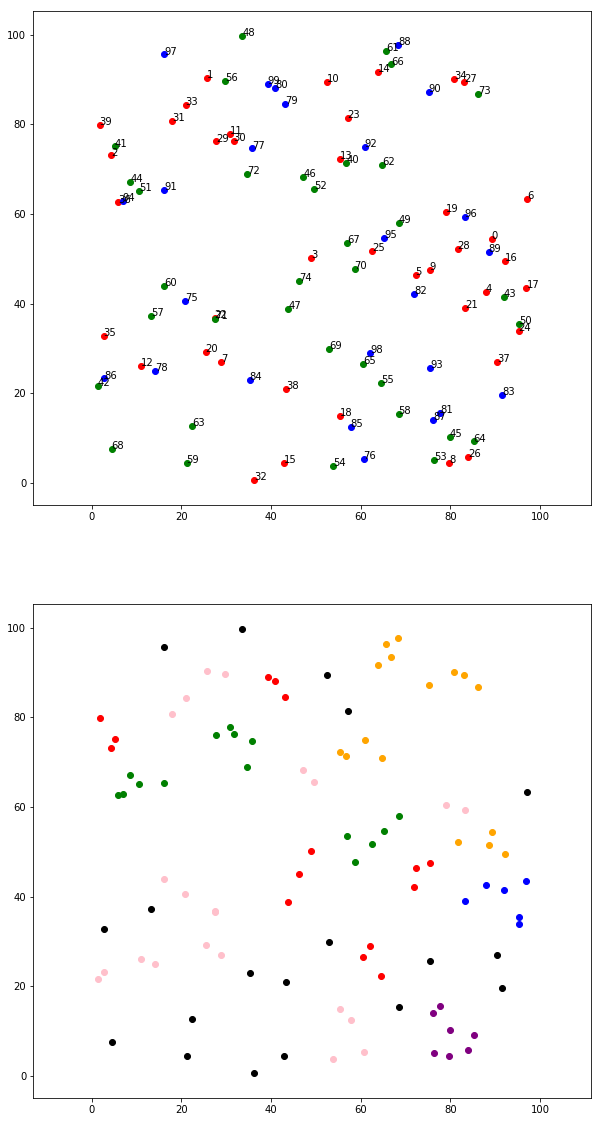

In [51]:
grp_clr = {'d1':'black',\
           'd2':'pink',\
           'd3':'red',\
           'd4':'orange',\
           'd5':'green',\
           'd6':'blue',\
           'd7':'purple',\
           'd8':'tan',\
           'd10':'grey'\
          }

cat_clr = {'A':'red',\
           'B':'green',\
           'C':'blue'\
          }

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,20))

for z in range(len(test_x)):
    ax1.scatter(test_x[z], test_y[z], color=cat_clr[onc_gs.loc[z,'catname']])
    ax2.scatter(test_x[z], test_y[z], color=grp_clr[onc_gs.loc[z,'oncflag']])
    ax1.text(test_x[z], test_y[z], s=str(z))
    ax1.axis('equal')
    ax2.axis('equal')

In [52]:
onc_gs.to_csv('/Users/alin/Documents/check_group.csv')